In [1]:
import sys
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.10.1 anndata==0.10.7 umap==0.5.6 numpy==1.26.4 scipy==1.11.4 pandas==2.1.4 scikit-learn==1.2.2 statsmodels==0.14.0 igraph==0.11.5 pynndescent==0.5.12


In [2]:
adata = sc.read_h5ad('VTA_GABA_mix.h5ad')

In [6]:
adata

AnnData object with n_obs × n_vars = 7940 × 22948
    obs: 'n_genes', 'percent_mito', 'n_counts', 'doublet_score', 'predicted_doublet', 'Neuron', 'Sample', 'Neuron_merge', 'Class_new'
    var: 'gene_ids', 'feature_types', 'n_cells-VTA_1', 'highly_variable-VTA_1', 'means-VTA_1', 'dispersions-VTA_1', 'dispersions_norm-VTA_1', 'n_cells-VTA_2', 'highly_variable-VTA_2', 'means-VTA_2', 'dispersions-VTA_2', 'dispersions_norm-VTA_2', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Class_new_colors', 'Neuron_colors', 'Neuron_merge_colors', 'Sample_colors', 'hvg', 'neighbors', 'pca', 'umap'
    obsm: 'X_harmony', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [4]:
del adata.obs['leiden_res_1.00']
del adata.obs['leiden_res_1.20']

In [5]:
del adata.uns['dendrogram_leiden_res_0.50']
del adata.uns['dendrogram_leiden_res_0.80']
del adata.uns['dendrogram_leiden_res_1.00']
del adata.uns['dendrogram_leiden_res_1.20']
del adata.uns['dendrogram_leiden_res_1.50']
del adata.uns['leiden_res_0.50']
del adata.uns['leiden_res_0.80']
del adata.uns['leiden_res_1.00']
del adata.uns['leiden_res_1.20']
del adata.uns['leiden_res_1.50']
del adata.uns['leiden_res_0.50_colors']
del adata.uns['leiden_res_0.80_colors']
del adata.uns['leiden_res_1.00_colors']
del adata.uns['leiden_res_1.20_colors']
del adata.uns['leiden_res_1.50_colors']

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    with n_comps=50


/opt/anaconda3/lib/python3.11/site-packages/scanpy/preprocessing/_pca.py:374: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


    finished (0:00:00)


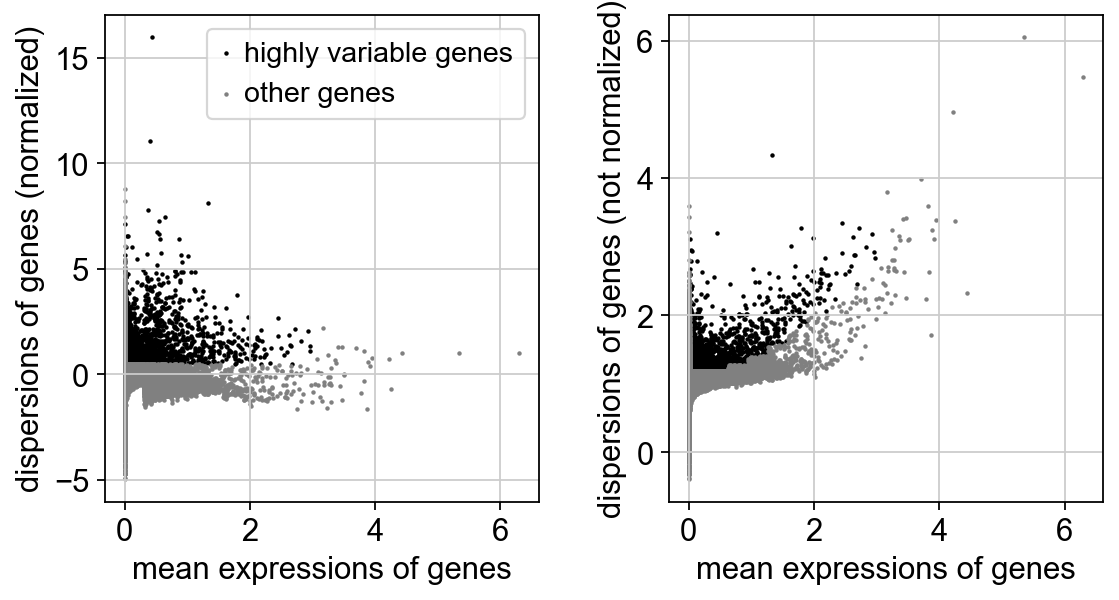

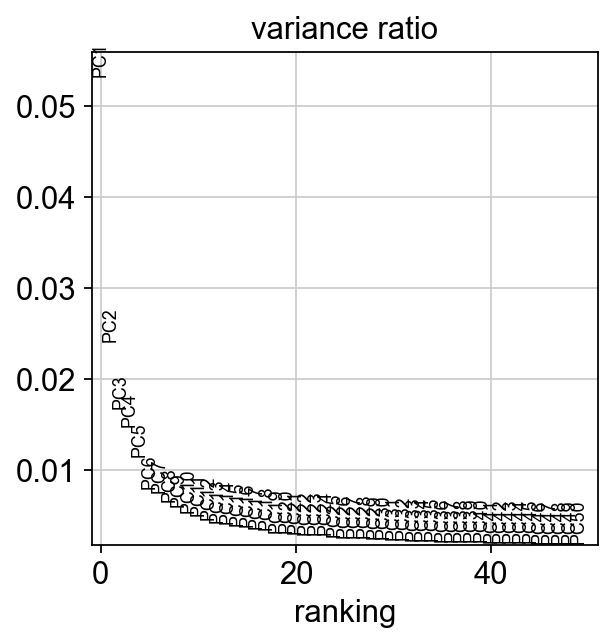

2024-07-08 10:22:51,388 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-07-08 10:22:52,466 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-07-08 10:22:52,490 - harmonypy - INFO - Iteration 1 of 10
2024-07-08 10:22:53,361 - harmonypy - INFO - Iteration 2 of 10
2024-07-08 10:22:53,920 - harmonypy - INFO - Converged after 2 iterations


computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)


In [7]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5,flavor='seurat')
sc.set_figure_params(color_map='RdBu_r')
sc.tl.pca(adata, svd_solver='arpack',use_highly_variable=True)
sc.pl.highly_variable_genes(adata)
sc.pl.pca_variance_ratio(adata, n_pcs=50)
sc.external.pp.harmony_integrate(adata, 'Sample', basis='X_pca', adjusted_basis='X_harmony')
sc.pp.neighbors(adata, n_neighbors=20, use_rep='X_harmony')


computing PCA
    with n_comps=50
    finished (0:00:00)


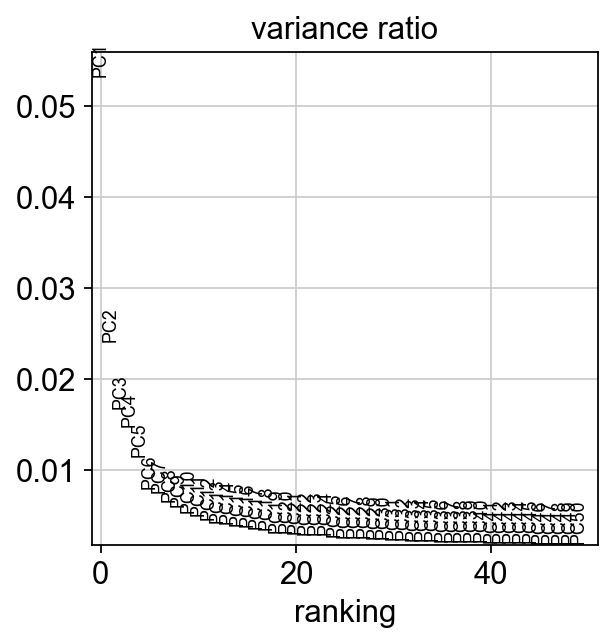

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)


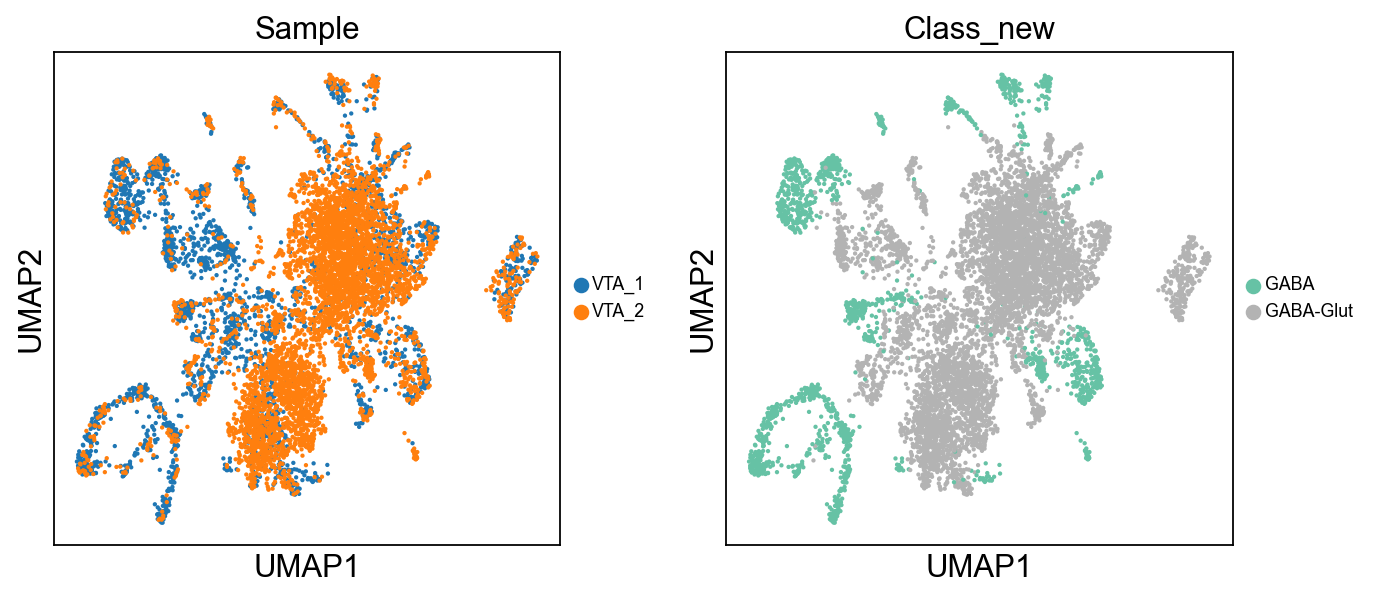

In [9]:
adata.obsm['X_pca'] = adata.obsm['X_harmony']
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, n_pcs=50)
sc.tl.umap(adata)
sc.pl.umap(
    adata,
    color=["Sample","Class_new"],
    legend_fontsize=8
)

computing PCA
    with n_comps=50
    finished (0:00:00)


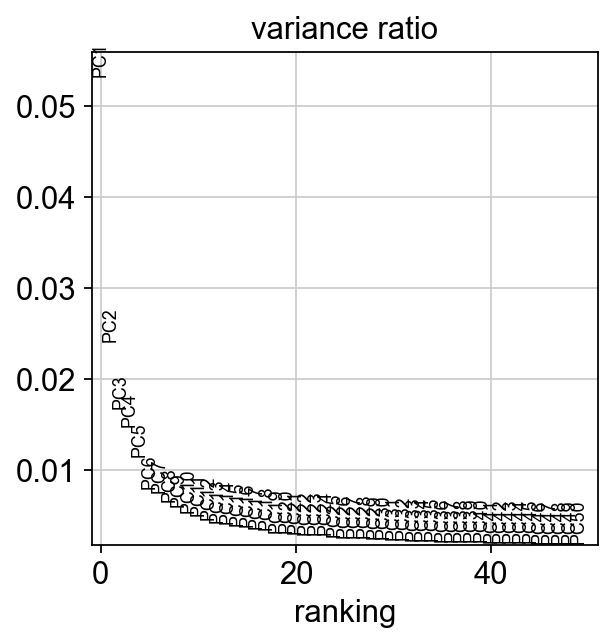

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)


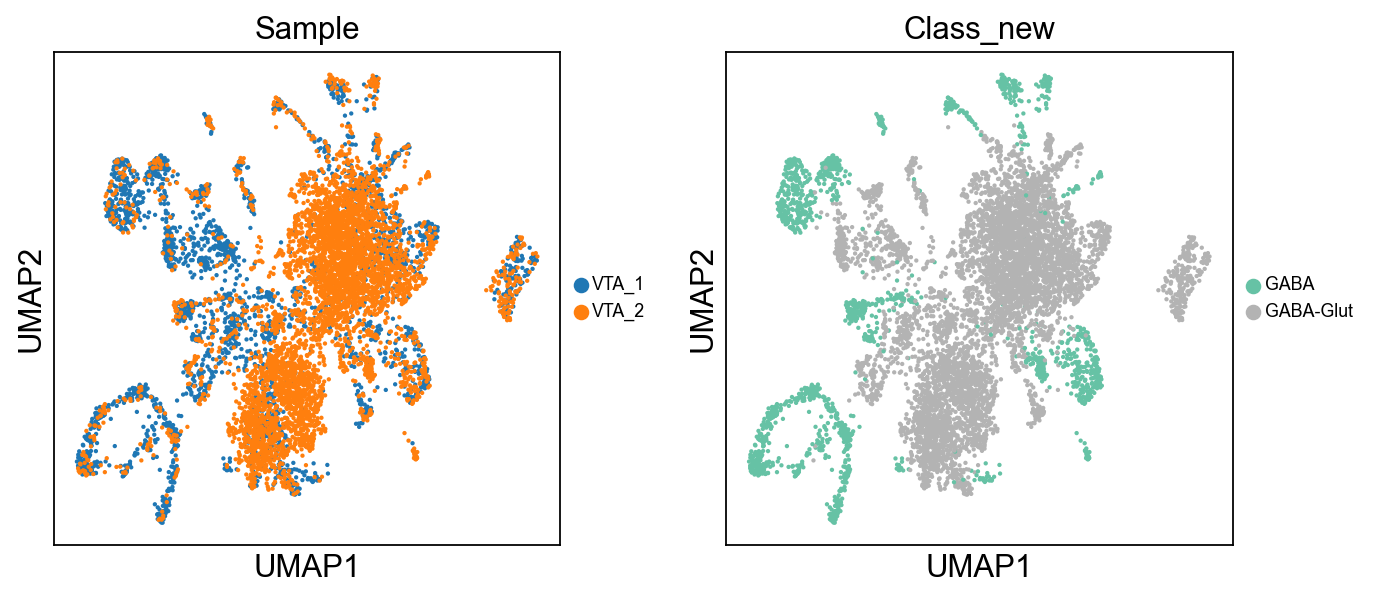

In [8]:
adata.obsm['X_pca'] = adata.obsm['X_harmony']
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, n_pcs=50)
sc.tl.umap(adata)
sc.pl.umap(
    adata,
    color=["Sample","Class_new"],
    legend_fontsize=8
)

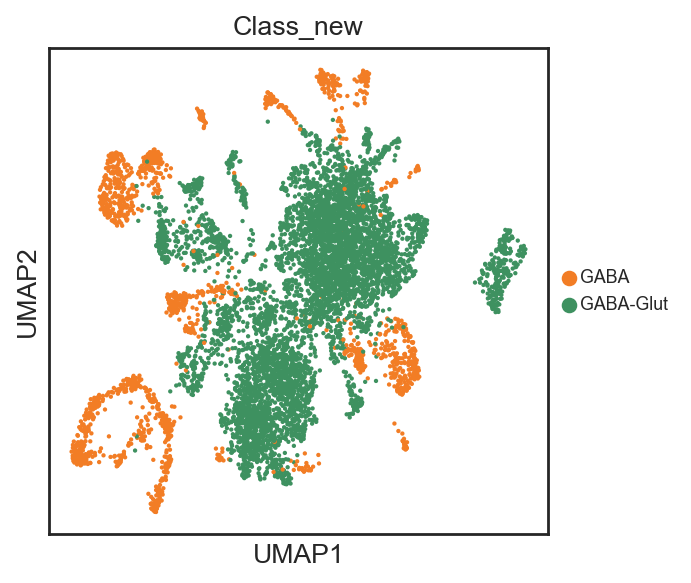

In [60]:
sc.pl.umap(
    adata,
    color="Class_new",
    legend_fontsize=8,palette=['#f27d25','#3e9160'],save='_GABA_mix_class_new.pdf'
)

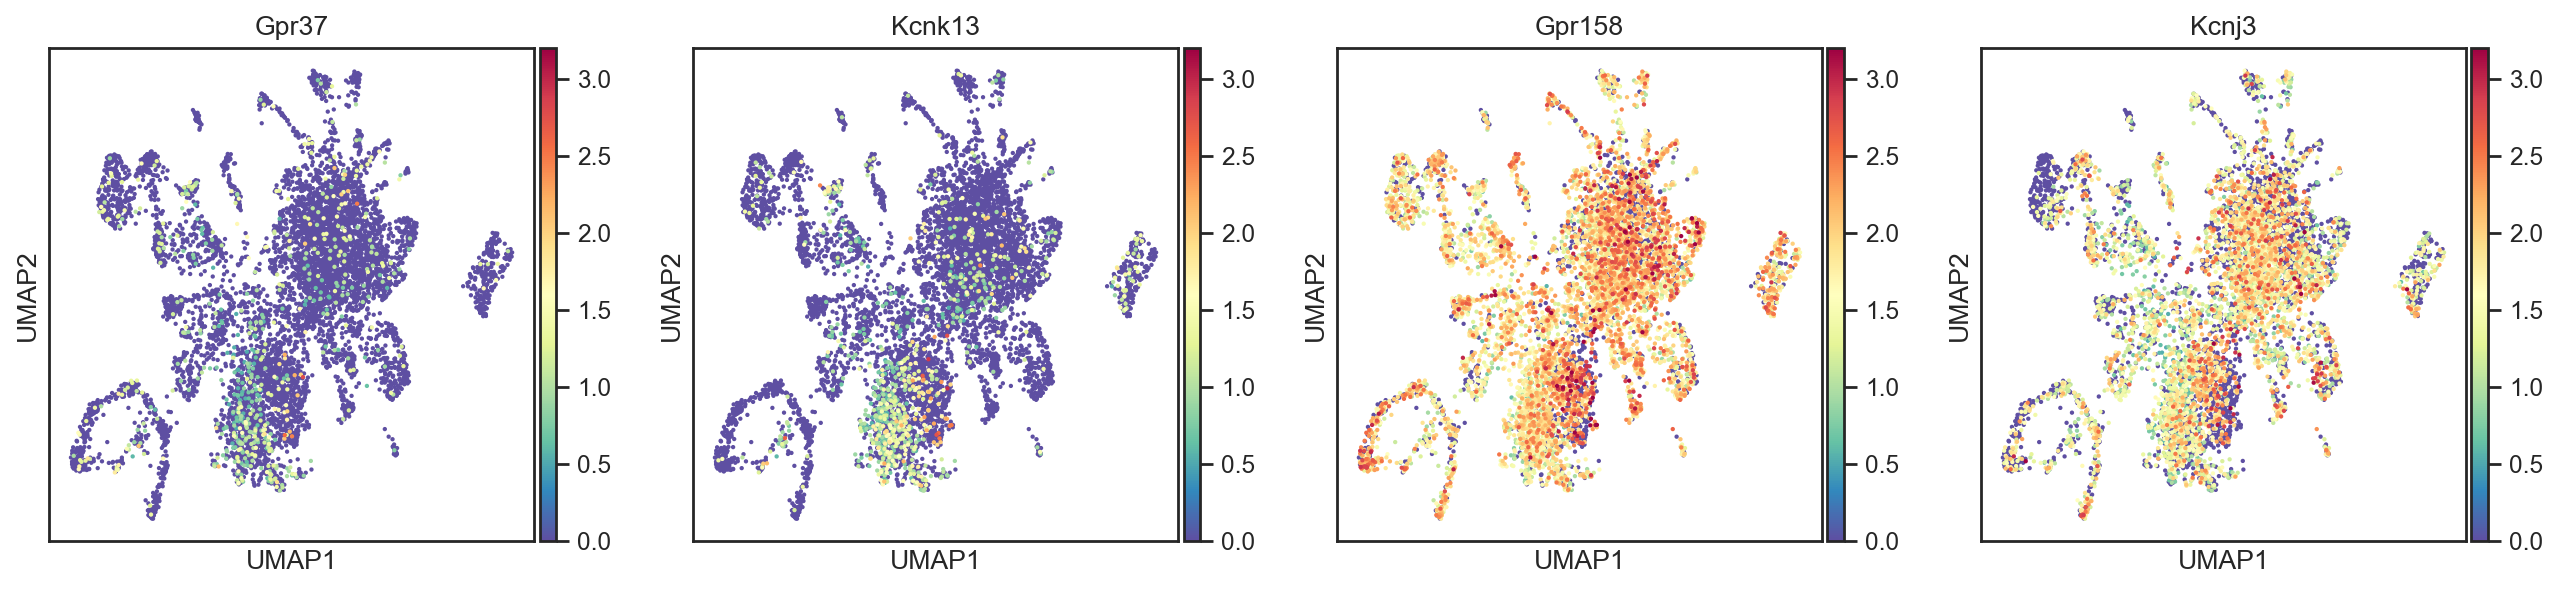

In [44]:
sc.pl.umap(
    adata,
    color=["Gpr37","Kcnk13","Gpr158","Kcnj3"],
    legend_fontsize=8,cmap='Spectral_r',vmax = 3.2,save='_GABA_mix_gene_expression.pdf'
)

In [30]:
gene = ["Gpr37","Kcnk13","Gpr158","Kcnj3"]

In [29]:
sc.tl.dendrogram(adata, groupby='Class_new',use_rep='X_harmony')

Storing dendrogram info using `.uns['dendrogram_Class_new']`


In [45]:
adata

AnnData object with n_obs × n_vars = 7940 × 22948
    obs: 'n_genes', 'percent_mito', 'n_counts', 'doublet_score', 'predicted_doublet', 'Neuron', 'Sample', 'Neuron_merge', 'Class_new'
    var: 'gene_ids', 'feature_types', 'n_cells-VTA_1', 'highly_variable-VTA_1', 'means-VTA_1', 'dispersions-VTA_1', 'dispersions_norm-VTA_1', 'n_cells-VTA_2', 'highly_variable-VTA_2', 'means-VTA_2', 'dispersions-VTA_2', 'dispersions_norm-VTA_2', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Class_new_colors', 'Neuron_colors', 'Neuron_merge_colors', 'Sample_colors', 'hvg', 'neighbors', 'pca', 'umap', 'dendrogram_Class_new'
    obsm: 'X_harmony', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'zscore', 'zscore_scale'
    obsp: 'connectivities', 'distances'

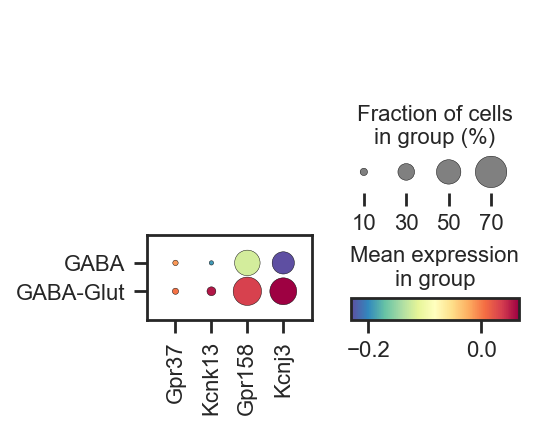

In [47]:
sc.pl.dotplot(adata, ["Gpr37","Kcnk13","Gpr158","Kcnj3"],groupby=["Class_new"],layer='zscore',cmap='Spectral_r')

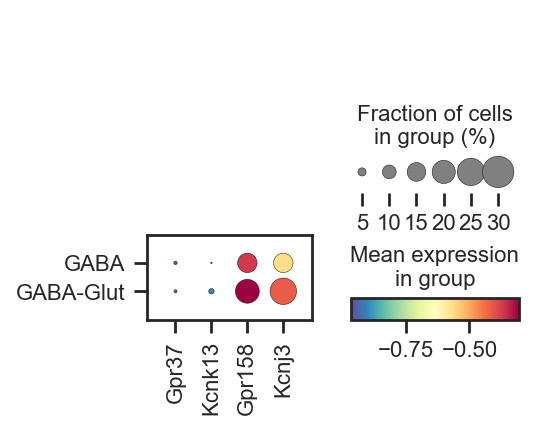

In [50]:
sc.pl.dotplot(adata, ["Gpr37","Kcnk13","Gpr158","Kcnj3"],groupby=["Class_new"],layer='zscore_scale',cmap='Spectral_r')

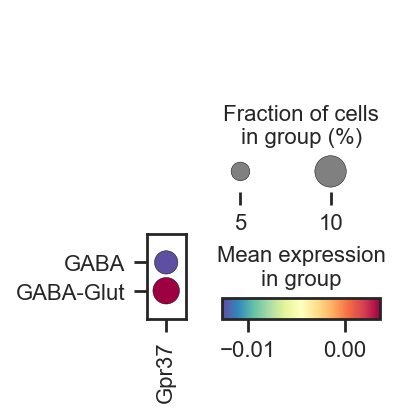

In [52]:
sc.pl.dotplot(adata, "Gpr37",groupby=["Class_new"],layer='zscore',cmap='Spectral_r')

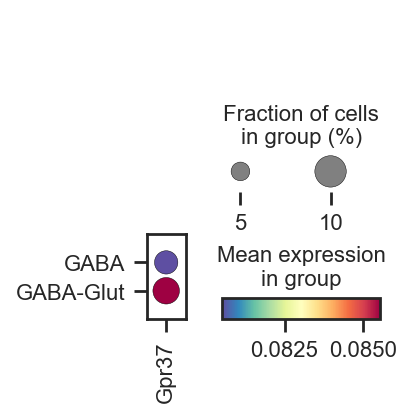

In [55]:
sc.pl.dotplot(adata, "Gpr37",groupby=["Class_new"],cmap='Spectral_r',save='gaba_mix_gpr37.pdf')

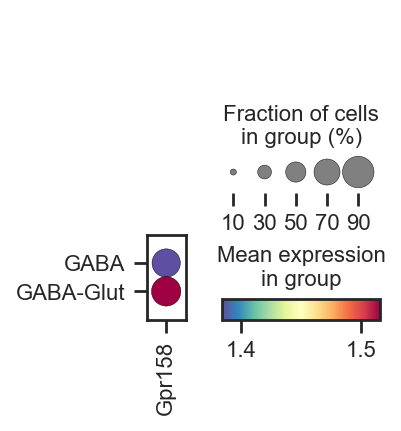

In [56]:
sc.pl.dotplot(adata, "Gpr158",groupby=["Class_new"],cmap='Spectral_r',save='gaba_mix_gpr158.pdf')

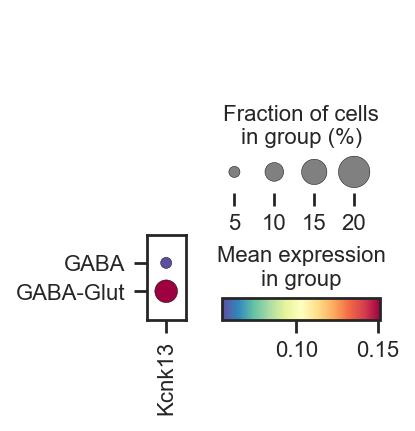

In [58]:
sc.pl.dotplot(adata, "Kcnk13",groupby=["Class_new"],cmap='Spectral_r',save='gaba_mix_kcnk13.pdf')

In [11]:
import seaborn as sns

In [12]:
import anndata 
from scipy.stats import zscore
from scipy import sparse 
import itertools
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA
from umap import UMAP
from py_pcha import PCHA
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances_argmin

In [13]:
zlognorm_allgene = zscore(np.array(adata.X.todense()), axis=0)
adata.layers['zscore'] = zlognorm_allgene
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(zlognorm_allgene)
scale_zlognorm_allgene = scaler.transform(zlognorm_allgene)
adata.layers['zscore_scale'] = scale_zlognorm_allgene

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [15]:
adata.write('VTA_GABA_mix.h5ad')

In [16]:
ge = pd.DataFrame(adata.X.todense(), index= adata.obs.index,columns = adata.var.index )

In [17]:
umap = pd.DataFrame(adata.obsm['X_umap'],index = adata.obs.index,columns=['UMAP 1','UMAP 2'])

In [18]:
ge_zscore = pd.DataFrame(adata.layers['zscore_scale'], index= adata.obs.index,columns = adata.var.index )

In [19]:
umap['Gpr37'] = list(ge_zscore['Gpr37'])
umap['Gpr158'] = list(ge_zscore['Gpr158'])
umap['Kcnk13'] = list(ge_zscore['Kcnk13'])
umap['Kcnj3'] = list(ge_zscore['Kcnj3'])
umap['Kcnd2'] = list(ge_zscore['Kcnd2'])
umap['Kcnn1'] = list(ge_zscore['Kcna1'])
umap['Kcnd3'] = list(ge_zscore['Kcnd3'])
umap['Kcnn2'] = list(ge_zscore['Kcna2'])
umap['Kcnj6'] = list(ge_zscore['Kcnj6'])
umap['Hcn1'] = list(ge_zscore['Hcn1'])
umap['Hcn2'] = list(ge_zscore['Hcn2'])


In [20]:
umap.to_csv('gaba_mix_umap.xls',index=True,sep='\t')

In [19]:
umap_bin=pd.read_csv('gaba_mix_umap_output_all.xls',sep='\t')

In [20]:
umap_bin

Bin_1  Bin2     Gpr37    Gpr158    Kcnk13     Kcnj3     Kcnd2     Kcnn1  \
0       -4     0 -0.910807 -0.224179 -0.957705 -0.731323 -0.126962 -0.842389   
1       -4     1 -0.921233 -0.409198 -1.000000 -0.624779 -0.166297 -0.890191   
2       -4     2 -1.000000 -1.000000 -1.000000 -1.000000  0.441743 -1.000000   
3       -3     0 -0.860154 -0.129521 -1.000000 -0.591805 -0.123669 -0.877394   
4       -3     1 -1.000000 -0.271758 -0.962729 -0.457253 -0.141780 -0.969189   
..     ...   ...       ...       ...       ...       ...       ...       ...   
186     17     7 -0.954315 -0.403429 -0.867502 -0.708504 -0.198296 -0.985708   
187     17     8 -1.000000 -0.306647 -0.823453 -0.735024 -0.162603 -0.908969   
188     18     6 -1.000000 -0.314456 -1.000000 -0.118822  0.320777 -1.000000   
189     18     7 -0.969925 -0.298387 -1.000000 -0.486527 -0.115648 -0.960888   
190     18     8 -1.000000 -0.078685 -1.000000 -1.000000 -0.207969 -1.000000   

        Kcnd3     Kcnn2  Unnamed: 10  
0    0.018237 -0.828341          NaN  
1   -0.144199 -0.752127          NaN  
2    0.392950 -1.000000          NaN  
3   -0.059474 -0.807796          NaN  
4   -0.004934 -0.894209          NaN  
..        ...       ...          ...  
186 -0.463777 -0.845364          NaN  
187 -0.125980 -0.950646          NaN  
188  0.102626 -1.000000          NaN  
189 -0.006283 -0.719605          NaN  
190 -0.109814  0.325979          NaN  

[191 rows x 11 columns]

In [22]:
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression

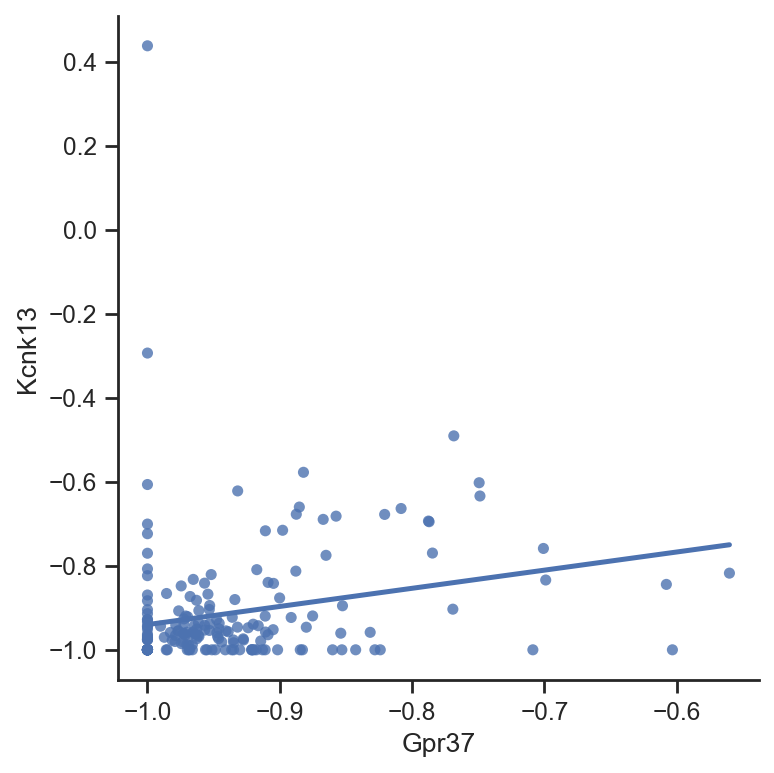

In [24]:
sns.lmplot(data=umap_bin, x="Gpr37", y="Kcnk13", ci=None,scatter_kws=dict(s=25,edgecolor='none'))

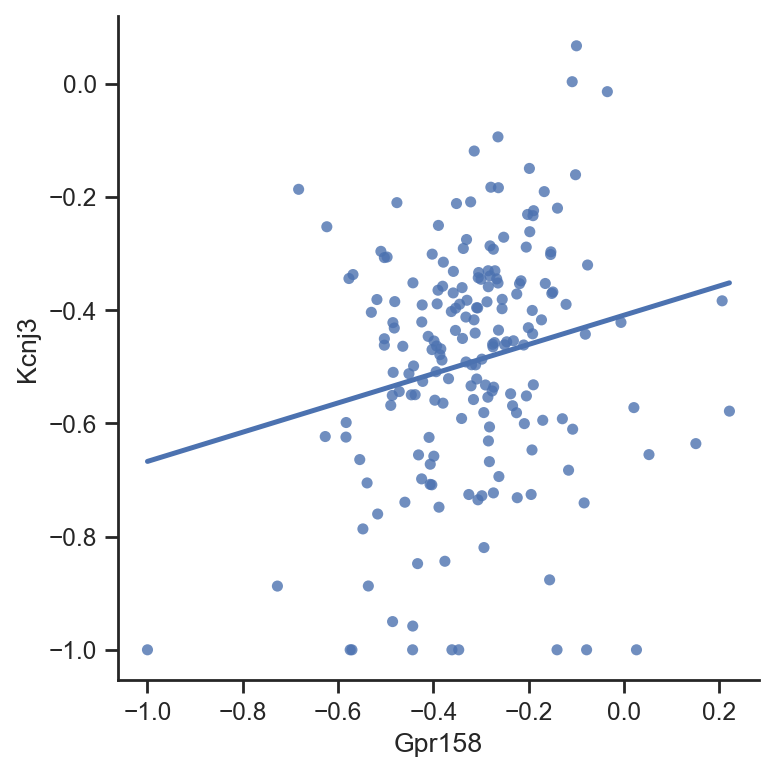

In [41]:
sns.lmplot(data=umap_bin, x="Gpr158", y="Kcnj3", ci=None,scatter_kws=dict(s=25,edgecolor='none'))

In [23]:
sns.set_theme(style="ticks")

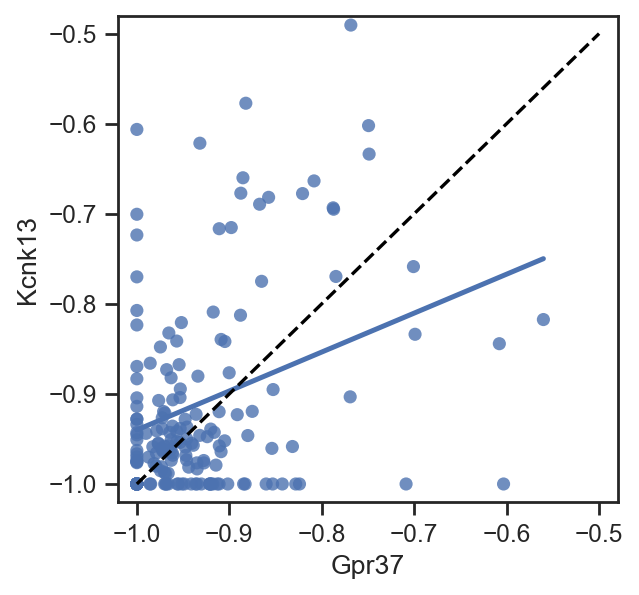

In [25]:
fit = sns.regplot(data=umap_bin, x="Gpr37", y="Kcnk13",ci=None,scatter_kws=dict(s=35,edgecolor='none'))

x = np.linspace(-1, -0.5, 10)
y = x
# 使用plot函数画出虚线，'--'表示虚线
plt.plot(x, y, '--', color='black')
plt.ylim((-1.02, -0.48))
plt.xlim((-1.02, -0.48))
plt.savefig('gaba_mix_Gpr37_Kcnk13.pdf')

In [40]:
slope,intercept = np.polyfit(list(umap_bin['Gpr37']), list(umap_bin['Kcnk13']),1)
spearman_coef, spearman_p = spearmanr(list(umap_bin['Gpr37']), list(umap_bin['Kcnk13']))
print(f"Gpr37_Kcnk13,r = {spearman_coef:4.2f}, p-value= {spearman_p:4.5f},slope = {slope:4.2f}, intercept= {intercept:4.2f}")

Gpr37_Kcnk13,r = 0.30, p-value= 0.00003,slope = 0.43, intercept= -0.51


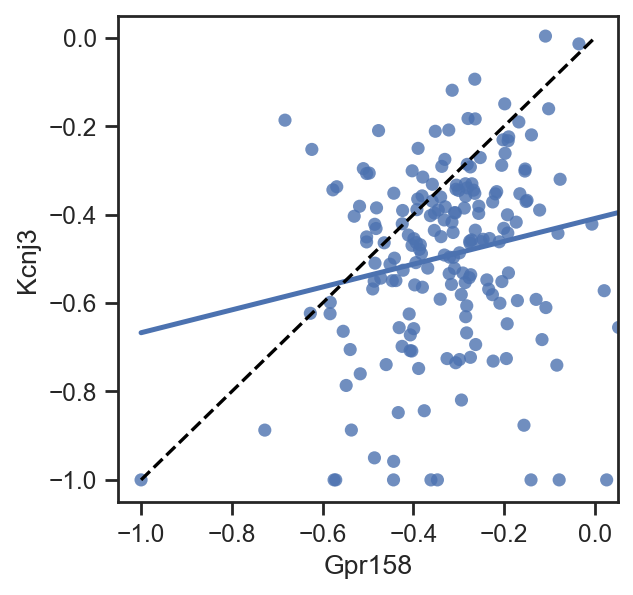

In [27]:
# 使用regplot绘制散点图并进行线性拟合
fit = sns.regplot(data=umap_bin, x="Gpr158", y="Kcnj3",ci=None,scatter_kws=dict(s=35,edgecolor='none'))

x = np.linspace(-1, 0, 10)
y = x
# 使用plot函数画出虚线，'--'表示虚线
plt.plot(x, y, '--', color='black')
plt.ylim((-1.05, 0.05))
plt.xlim((-1.05, 0.05))
plt.savefig('gaba_mix_Gpr158_Kcnj3.pdf')

In [28]:
slope,intercept = np.polyfit(list(umap_bin['Gpr158']), list(umap_bin['Kcnj3']),1)
spearman_coef, spearman_p = spearmanr(list(umap_bin['Gpr158']), list(umap_bin['Kcnj3']))
print(f"Gpr158_Kcnj3,r = {spearman_coef:4.2f}, p-value= {spearman_p:4.5f},slope = {slope:4.2f}, intercept= {intercept:4.2f}")

Gpr158_Kcnj3,r = 0.19, p-value= 0.00893,slope = 0.26, intercept= -0.41


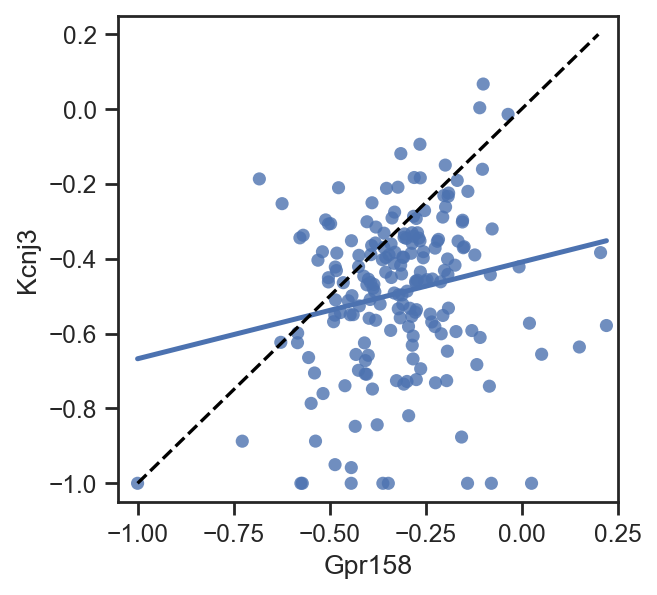

In [43]:
# 使用regplot绘制散点图并进行线性拟合
fit = sns.regplot(data=umap_bin, x="Gpr158", y="Kcnj3",ci=None,scatter_kws=dict(s=35,edgecolor='none'))

x = np.linspace(-1, 0.2, 10)
y = x
# 使用plot函数画出虚线，'--'表示虚线
plt.plot(x, y, '--', color='black')
plt.ylim((-1.05, 0.25))
plt.xlim((-1.05, 0.25))
plt.savefig('gaba_mix_Gpr158_Kcnj3.pdf')

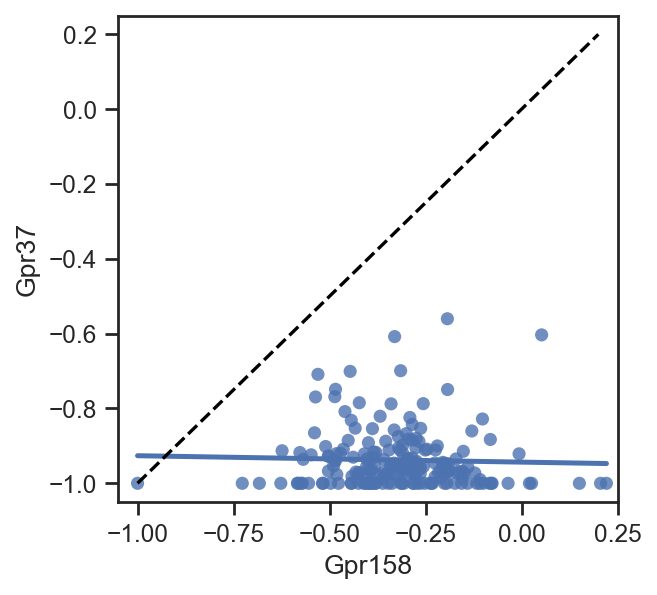

In [61]:
# 使用regplot绘制散点图并进行线性拟合
fit = sns.regplot(data=umap_bin, x="Gpr158", y="Gpr37",ci=None,scatter_kws=dict(s=35,edgecolor='none'))

x = np.linspace(-1, 0.2, 10)
y = x
# 使用plot函数画出虚线，'--'表示虚线
plt.plot(x, y, '--', color='black')
plt.ylim((-1.05, 0.25))
plt.xlim((-1.05, 0.25))
plt.savefig('gaba_mix_Gpr158_Gpr37.pdf')

In [62]:
slope,intercept = np.polyfit(list(umap_bin['Gpr37']), list(umap_bin['Gpr158']),1)
spearman_coef, spearman_p = spearmanr(list(umap_bin['Gpr37']), list(umap_bin['Gpr158']))
print(f"Gpr37_Gpr158,r = {spearman_coef:4.2f}, p-value= {spearman_p:4.5f},slope = {slope:4.2f}, intercept= {intercept:4.2f}")

Gpr37_Gpr158,r = -0.08, p-value= 0.27337,slope = -0.07, intercept= -0.39


In [9]:
gene_1 = ['Kcnj3','Kcnj6','Hcn1','Hcn2']

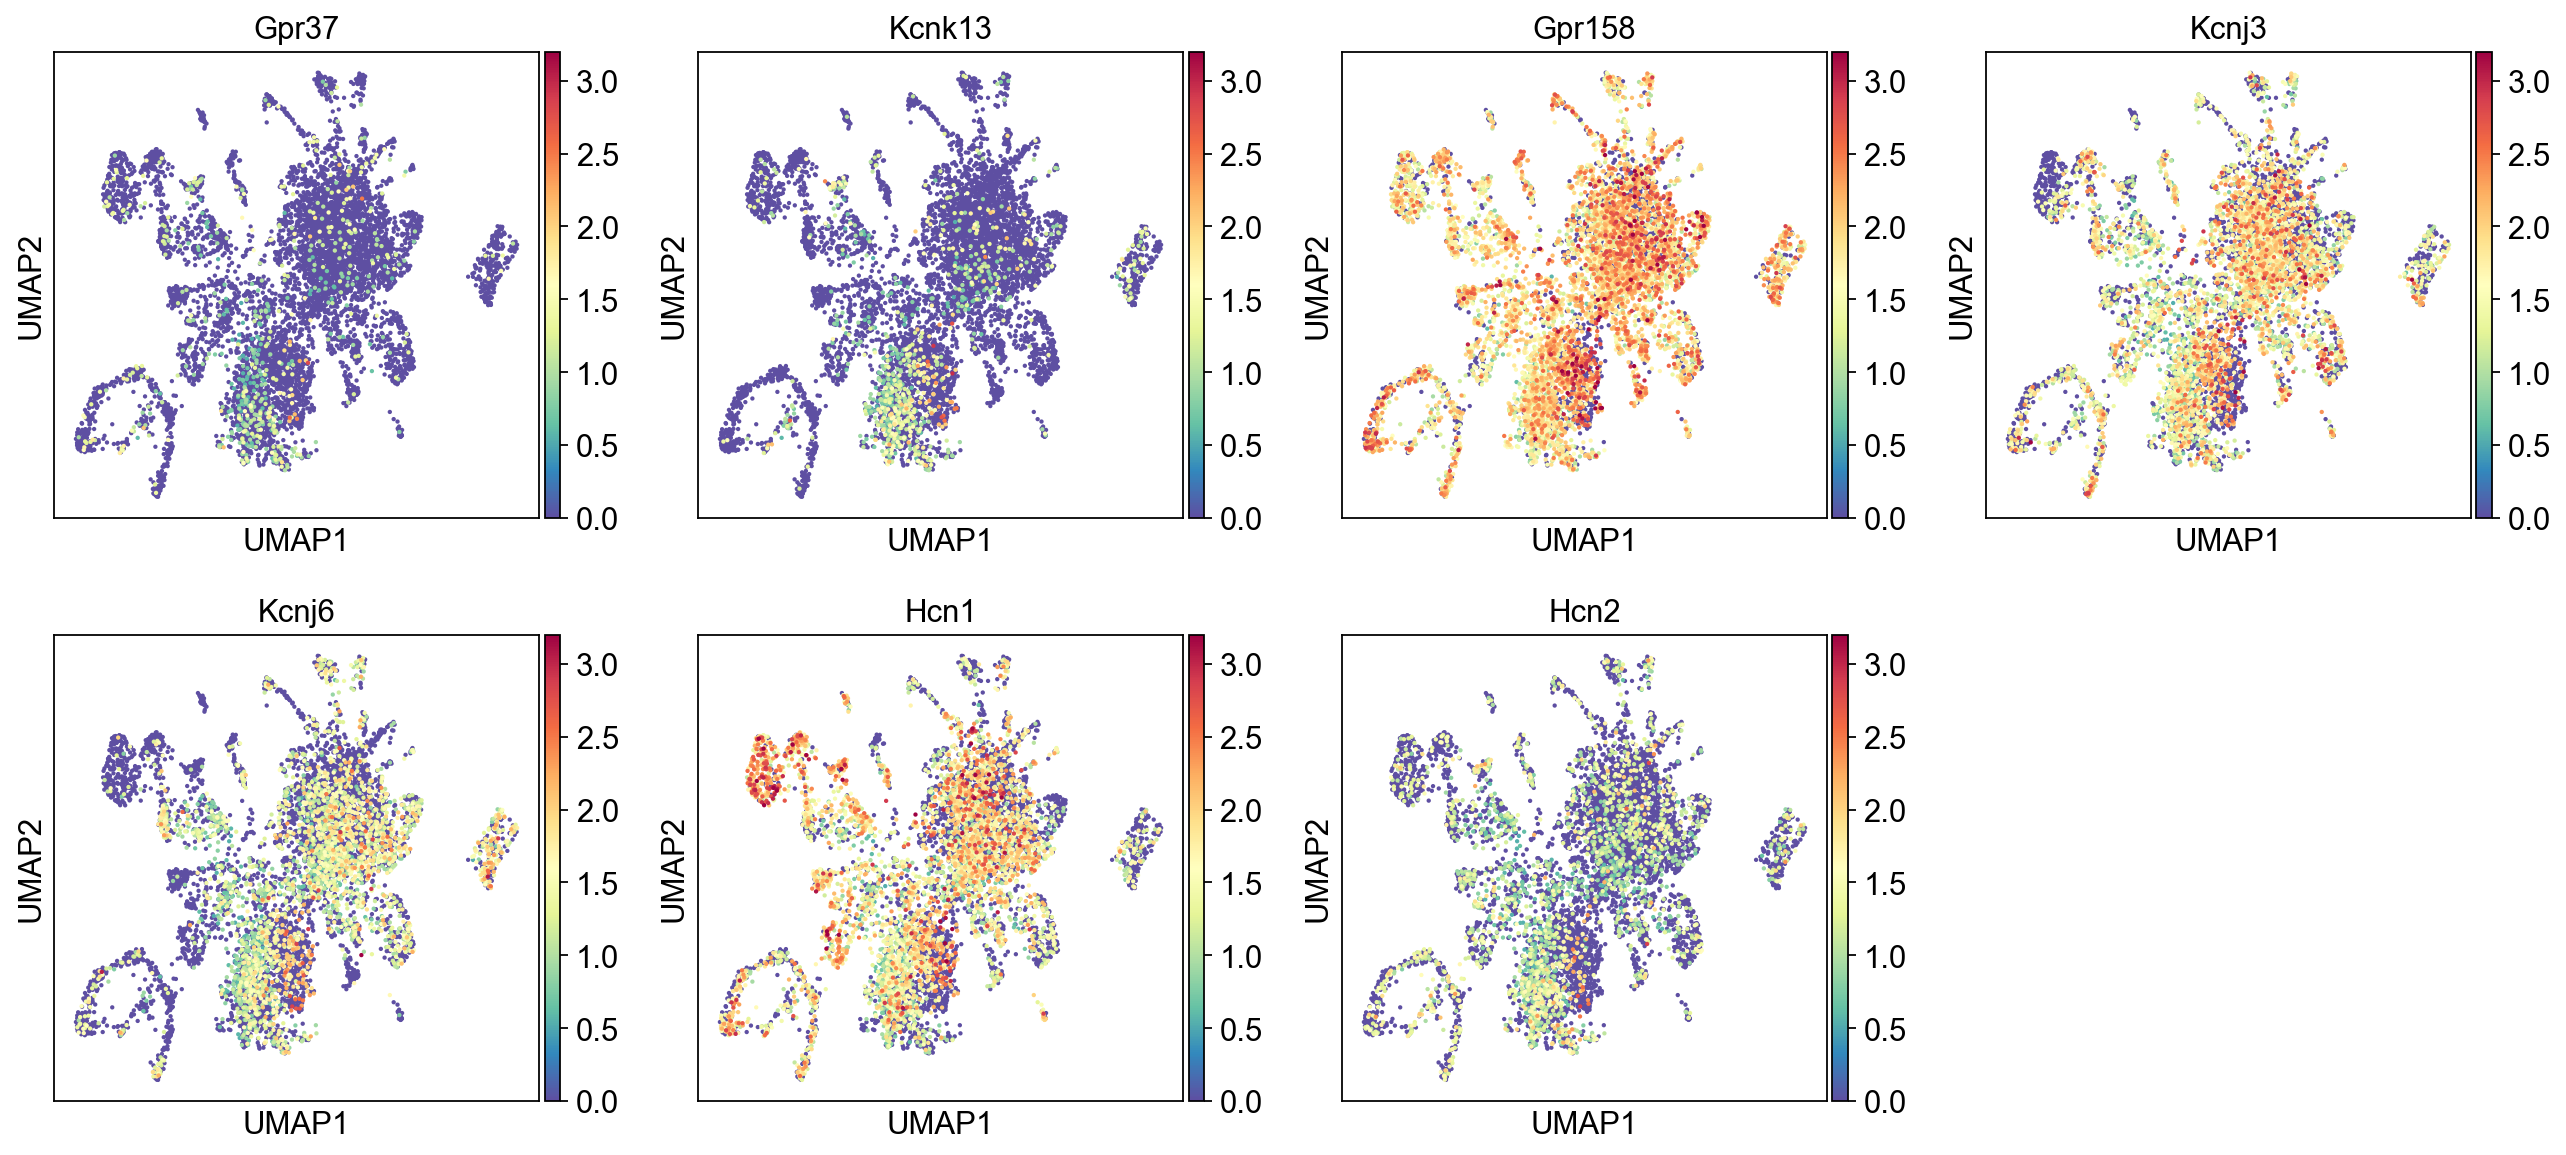

In [10]:
sc.pl.umap(
    adata,
    color=["Gpr37","Kcnk13","Gpr158","Kcnj3",'Kcnj6','Hcn1','Hcn2'],
    legend_fontsize=8,cmap='Spectral_r',vmax = 3.2
)

In [21]:
umap_bin_new=pd.read_csv('gaba_mix_umap_output_all_new.xls',sep='\t')

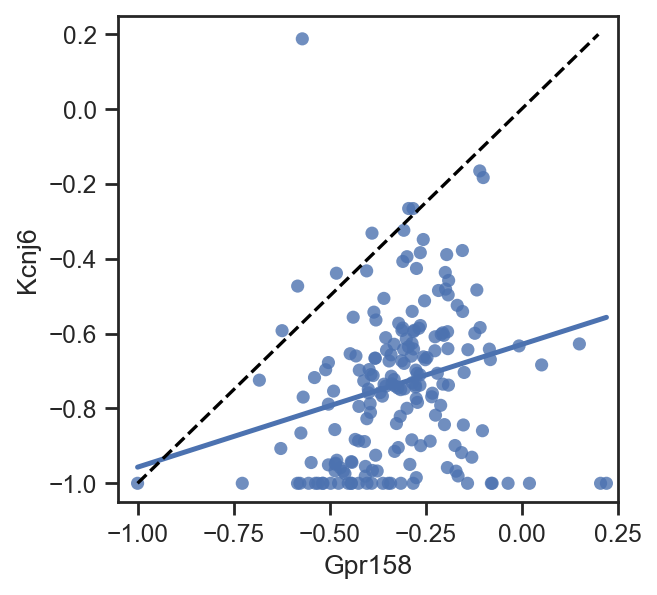

In [24]:
fit = sns.regplot(data=umap_bin_new, x="Gpr158", y="Kcnj6",ci=None,scatter_kws=dict(s=35,edgecolor='none'))

x = np.linspace(-1, 0.2, 10)
y = x
# 使用plot函数画出虚线，'--'表示虚线
plt.plot(x, y, '--', color='black')
plt.ylim((-1.05, 0.25))
plt.xlim((-1.05, 0.25))
plt.savefig('gaba_mix_Gpr158_Kcnj6.pdf')

In [26]:
slope,intercept = np.polyfit(list(umap_bin_new['Kcnj6']), list(umap_bin_new['Gpr158']),1)
spearman_coef, spearman_p = spearmanr(list(umap_bin_new['Kcnj6']), list(umap_bin_new['Gpr158']))
print(f"Kcnj6_Gpr158,r = {spearman_coef:4.2f}, p-value= {spearman_p:4.5f},slope = {slope:4.2f}, intercept= {intercept:4.2f}")

Kcnj6_Gpr158,r = 0.31, p-value= 0.00001,slope = 0.17, intercept= -0.19


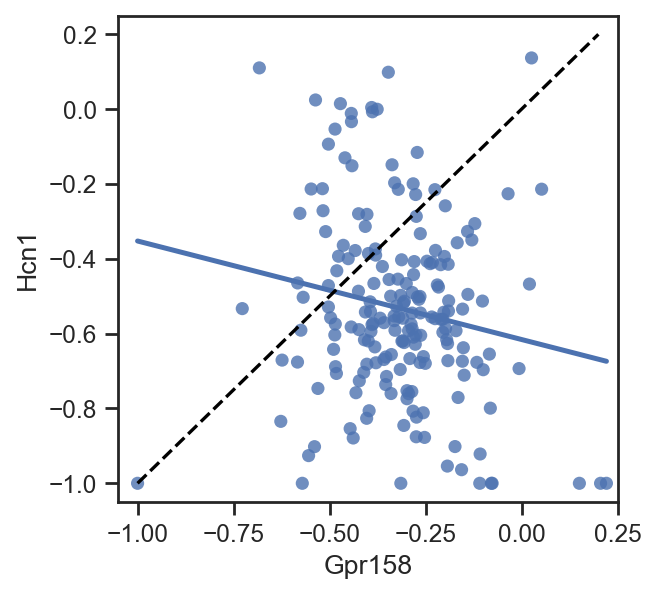

In [27]:
fit = sns.regplot(data=umap_bin_new, x="Gpr158", y="Hcn1",ci=None,scatter_kws=dict(s=35,edgecolor='none'))

x = np.linspace(-1, 0.2, 10)
y = x
# 使用plot函数画出虚线，'--'表示虚线
plt.plot(x, y, '--', color='black')
plt.ylim((-1.05, 0.25))
plt.xlim((-1.05, 0.25))
plt.savefig('gaba_mix_Gpr158_Hcn1.pdf')

In [28]:
xslope,intercept = np.polyfit(list(umap_bin_new['Hcn1']), list(umap_bin_new['Gpr158']),1)
spearman_coef, spearman_p = spearmanr(list(umap_bin_new['Hcn1']), list(umap_bin_new['Gpr158']))
print(f"Hcn1_Gpr158,r = {spearman_coef:4.2f}, p-value= {spearman_p:4.5f},slope = {slope:4.2f}, intercept= {intercept:4.2f}")

Hcn1_Gpr158,r = -0.15, p-value= 0.03356,slope = 0.17, intercept= -0.38


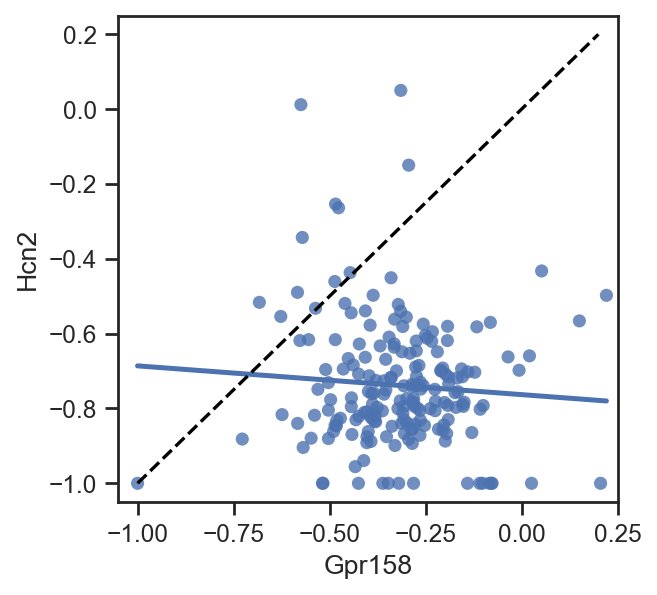

In [29]:
fit = sns.regplot(data=umap_bin_new, x="Gpr158", y="Hcn2",ci=None,scatter_kws=dict(s=35,edgecolor='none'))

x = np.linspace(-1, 0.2, 10)
y = x
# 使用plot函数画出虚线，'--'表示虚线
plt.plot(x, y, '--', color='black')
plt.ylim((-1.05, 0.25))
plt.xlim((-1.05, 0.25))
plt.savefig('gaba_mix_Gpr158_Hcn2.pdf')

In [30]:
xslope,intercept = np.polyfit(list(umap_bin_new['Hcn2']), list(umap_bin_new['Gpr158']),1)
spearman_coef, spearman_p = spearmanr(list(umap_bin_new['Hcn2']), list(umap_bin_new['Gpr158']))
print(f"Hcn2_Gpr158,r = {spearman_coef:4.2f}, p-value= {spearman_p:4.5f},slope = {slope:4.2f}, intercept= {intercept:4.2f}")

Hcn2_Gpr158,r = -0.03, p-value= 0.72927,slope = 0.17, intercept= -0.37


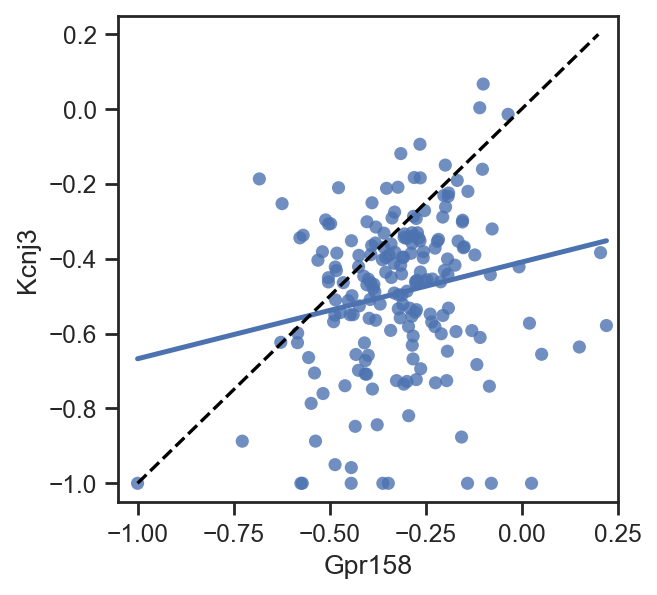

In [32]:
fit = sns.regplot(data=umap_bin_new, x="Gpr158", y="Kcnj3",ci=None,scatter_kws=dict(s=35,edgecolor='none'))

x = np.linspace(-1, 0.2, 10)
y = x
# 使用plot函数画出虚线，'--'表示虚线
plt.plot(x, y, '--', color='black')
plt.ylim((-1.05, 0.25))
plt.xlim((-1.05, 0.25))
plt.savefig('gaba_mix_Gpr158_Kcnj3.pdf')

In [33]:
xslope,intercept = np.polyfit(list(umap_bin_new['Kcnj3']), list(umap_bin_new['Gpr158']),1)
spearman_coef, spearman_p = spearmanr(list(umap_bin_new['Kcnj3']), list(umap_bin_new['Gpr158']))
print(f"Kcnj3_Gpr158,r = {spearman_coef:4.2f}, p-value= {spearman_p:4.5f},slope = {slope:4.2f}, intercept= {intercept:4.2f}")

Kcnj3_Gpr158,r = 0.19, p-value= 0.00893,slope = 0.17, intercept= -0.25
